### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of square distances between the parabola and the (x,y) points.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [3]:
xx, yy, aa, bb, cc, dd, ee = symbols('xx yy aa bb cc dd ee')

In [4]:
xdataor = np.array([18.2,28.2,38.2,48.2,58.2,68.2,78.2,88.2,98.2])/(10**2)
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
xdata=xdataor

0.182
0.982
2.5
1.4549999999999998


In [5]:
ydata = np.array([2.137,2.005,1.931,1.897,1.893,1.910,1.942,1.984,2.035])
yerr = np.array([0.001]*9)
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
#ydata

We want to find the parameters $a$,$b$,$c$ and $d$ of the cubic $y = d x^3 +c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - d x^3-c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

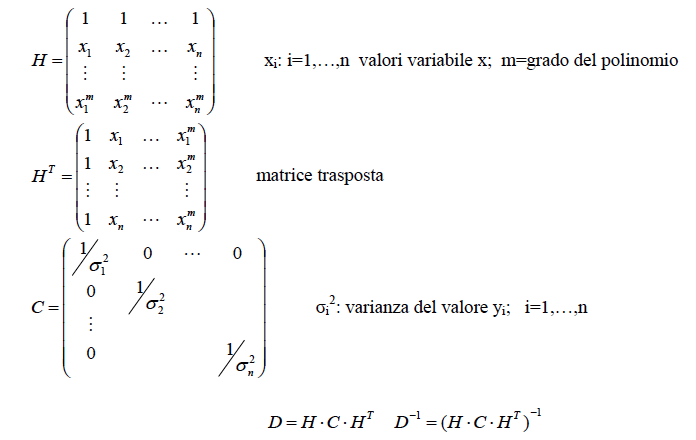

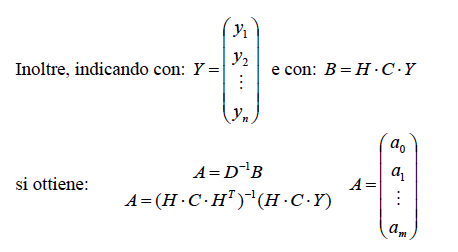

Calcolo matrice H e matrice trasposta

In [6]:
vect1=np.array([1]*9)
vect2=xdata
vect3=xdata**2
vect4=xdata**3
vect5=xdata**4
matH=np.matrix([vect1,vect2,vect3,vect4,vect5])
matHT = matH.T
#matH,matHT

calcolo matrice della varianza

In [7]:
varyinv = 1./(yerr*yerr)
matC=np.diag(varyinv)
#varyinv,matC

In [8]:
ydataprovv=ydata
matY=ydataprovv.reshape((-1, 1))
#matY

calcolo matrice A dei parametri

In [9]:
mat1=matH*matC*matHT
mat1_inv=np.linalg.inv(mat1)
mat2=matH*matC*matY
matA=np.dot(mat1_inv,mat2)
#matA

In [10]:
a, b, c, d , e= matA[0],matA[1],matA[2],matA[3],matA[4]
print (" a = ", a)
print (" b = ", b)
print (" c = ", c)
print (" d = ", d)
print (" e = ", e)

 a =  [[2.57599894]]
 b =  [[-3.29479163]]
 c =  [[5.50458832]]
 d =  [[-3.82727791]]
 e =  [[1.08682984]]


In [11]:
vara, varb, varc, vard , vare= mat1_inv[0,0], mat1_inv[1,1], mat1_inv[2,2],mat1_inv[3,3],mat1_inv[4,4]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
errd=np.sqrt(vard)
erre=np.sqrt(vare)
print (" errore su a = ",erra)
print (" errore su b = ",errb)
print (" errore su c = ",errc)
print (" errore su d = ",errd)
print (" errore su e = ",erre)

 errore su a =  0.00896402944784401
 errore su b =  0.08170613414492
 errore su c =  0.24795955457790383
 errore su d =  0.304659716653911
 errore su e =  0.13037212891194844


Plot, adding extra points for the cubic.

In [12]:
thickxdata = np.arange(0.1, 1.05, 0.01)
thx2=thickxdata**2
thx3=thickxdata**3
thx4=thickxdata**4
thydata=e*thx4+d*thx3+c*thx2+b*thickxdata+a
thiyarr=np.array(thydata)
thickydata=thiyarr.T

<ErrorbarContainer object of 3 artists>

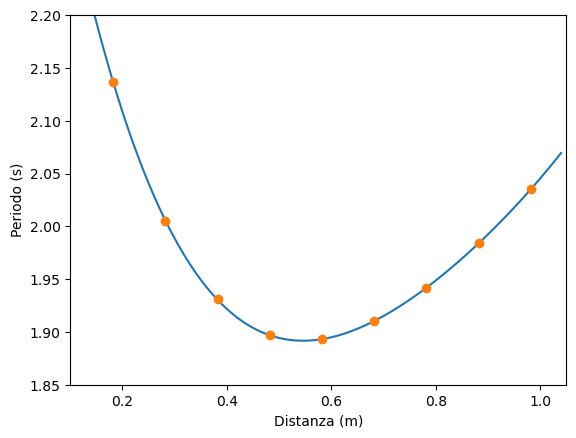

In [16]:
fig, ax = plt.subplots()
ax.set_xlabel('Distanza (m)')
ax.set_ylabel('Periodo (s)')
ax.set_xlim(0.1, 1.05)
ax.set_ylim(1.850, 2.200)
plt.plot(thickxdata,thickydata)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')

In [14]:
x2=xdata**2
x3=xdata**3
x4=xdata**4
thyatt=e*x4+d*x3+c*x2+b*xdata+a
ydatatt=np.array(thyatt)
scarto1 = (ydata-ydatatt)/yerr
scarto2 = (ydata-ydatatt)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-4)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  0.9992229992234006
 errore standard della stima =  0.00044703981908179066


In [15]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
scarto3=ydatatt-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print ("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9999901450544953
